In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [10]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-05 23:20:02--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 3974305 (3,8M) [application/x-httpd-php]
Сохранение в: «adult.data.3»

adult.data.3        100%[===================>]   3,79M   672KB/s    за 21s     

2019-04-05 23:20:24 (188 KB/s) - «adult.data.3» сохранён [3974305/3974305]



In [11]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [2]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [5]:
df = pd.read_csv('adult.data', skipinitialspace=True, names=cols)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [8]:
print('Number of men: ', df.sex.value_counts()['Male'])
print('Number of women: ', df.sex.value_counts()['Female'])

Number of men:  21790
Number of women:  10771


# Средний возраст мужчин и женщин?

In [9]:
print('Average male age: ', df.groupby('sex')['age'].mean()['Male'])
print('Average female age: ', df.groupby('sex')['age'].mean()['Female'])

Average male age:  39.43354749885268
Average female age:  36.85823043357163


# Какая доля граждан США (United-States) в данном датасете?

In [10]:
print(round(df['native-country'].value_counts(True)['United-States'], 2))

0.9


# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

Text(0, 0.5, 'People percentage')

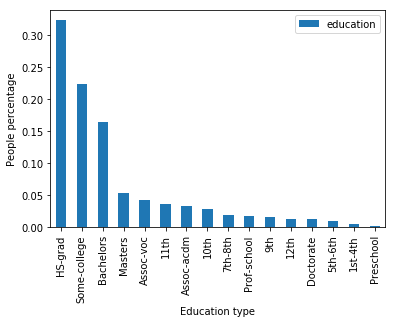

In [11]:
distr_df = pd.DataFrame(df.education.value_counts(normalize=True))
ax = distr_df.plot.bar()
ax.set_xlabel('Education type')
ax.set_ylabel('People percentage')

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [28]:
divorced = df['marital-status']=='Divorced'

print(df[divorced].fnlwgt.mean())
print(df[divorced].fnlwgt.std())


185802.79045689848
105646.78945933603


Text(0, 0.5, 'frequency')

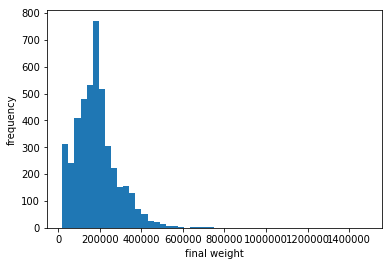

In [33]:
df_hist = df[divorced].fnlwgt
plot_hist = df_hist.plot.hist(bins=50)
plot_hist.set_xlabel('final weight')
plot_hist.set_ylabel('frequency')


Оно напоминает распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [14]:
edu_df = df.groupby('result')['education'].value_counts(normalize=True)['>50K']

In [15]:
edu_df

education
Bachelors       0.283255
HS-grad         0.213621
Some-college    0.176891
Masters         0.122306
Prof-school     0.053947
Assoc-voc       0.046040
Doctorate       0.039026
Assoc-acdm      0.033797
10th            0.007907
11th            0.007652
7th-8th         0.005101
12th            0.004209
9th             0.003443
5th-6th         0.002041
1st-4th         0.000765
Name: education, dtype: float64

In [18]:
print('people with BSc,MSc or PhD {}'.
     format(edu_df['Bachelors']+edu_df['Masters']+edu_df['Doctorate']))

people with BSc,MSc or PhD 0.4445861497258003


Ответ:Нет

# Сколько в среднем работают люди в неделю в зависимости от education?

In [19]:
df.groupby('education')['hours-per-week'].mean()

education
10th            37.052519
11th            33.925957
12th            35.780600
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
Assoc-acdm      40.504217
Assoc-voc       41.610709
Bachelors       42.614006
Doctorate       46.973366
HS-grad         40.575374
Masters         43.836332
Preschool       36.647059
Prof-school     47.425347
Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [20]:
print('Average weekly hours for men: ', round(df.groupby('sex')['hours-per-week'].mean()['Male'], 2))
print('Average weekly hours for women: ', round(df.groupby('sex')['hours-per-week'].mean()['Female'], 3))

Average weekly hours for men:  42.43
Average weekly hours for women:  36.41


Мужчины работают больше

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [27]:
not_related = df.relationship.isin(['Not-in-family', 'Unmarried'])
print('Not in relations:', df[not_related]['hours-per-week'].mean())
print('In relations:', df[~not_related]['hours-per-week'].mean())

Not in relations: 40.157944004765554
In relations: 40.157944004765554


# Из каких стран люди работают farmers/fishers?

In [22]:
print(df.groupby('occupation')['native-country'].value_counts()['Farming-fishing'])

native-country
United-States    879
Mexico            77
?                  5
Puerto-Rico        5
Guatemala          4
Philippines        4
Canada             2
Cuba               2
El-Salvador        2
Italy              2
Vietnam            2
Cambodia           1
England            1
France             1
Germany            1
Hong               1
Ireland            1
Japan              1
Poland             1
Portugal           1
Yugoslavia         1
Name: native-country, dtype: int64


# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [23]:
maximum = df['hours-per-week'].max()
print('Maximum hours per week ', maximum)
print('Number of people with maximum hours per week:', df['hours-per-week'].value_counts()[maximum])
print('With salary less than 50K:', df.groupby('hours-per-week')['result'].value_counts()[maximum]['<=50K'])
print('With salary more than 50K:', df.groupby('hours-per-week')['result'].value_counts()[maximum]['>50K'])

Maximum hours per week  99
Number of people with maximum hours per week: 85
With salary less than 50K: 60
With salary more than 50K: 25
